# DS105-04-10 - ANOVAs - One Way Between Subjects - Activity in Python

---
## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

___
## Load Data

In [2]:
youtube = pd.read_csv('./assets/YouTubeChannels_Python.csv')

In [3]:
youtube.head(2)

,Rank,Gr2de,Channel name,Video Uploads,Subscribers,Video views
0,1st,0,Zee TV,82757,18752951,20869786591
1,2nd,0,T-Series,12661,61196302,47548839843


___
## Question Setup
Is there a difference in the number of views `Video views` compared to all the different grade categories `Gr2de`?

In [4]:
# What are the levels in `Gr2de`?
youtube.Gr2de.unique()

array([0, 1, 2, 3])

___
## Data Wrangling

### Subsetting needed variables
Keep the variables needed: `Gr2de` and `Video views`.

In [5]:
youtube1 = youtube[['Gr2de','Video views']]

In [6]:
youtube1.head()

,Gr2de,Video views
0,0,20869786591
1,0,47548839843
2,0,9793305082
3,0,22675948293
4,0,26273668433


### Confirmging `Video views` is an integer
The Dependent Variable must be in an integer format.

In [7]:
# Check current format
youtube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Gr2de        5000 non-null   int64
 1   Video views  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


### Changing `Gr2de` to a string for ANOVA

In [8]:
def recode (series):
    if series == 0: 
        return "A++"
    if series == 1: 
        return "A+"
    if series == 2: 
        return "A"
    if series == 3: 
        return "B+"

youtube1['Gr2deR'] = youtube1['Gr2de'].apply(recode)
#NOTE: Will get a warning for recode, but will still be successful.

/var/folders/p_/8z_nx_rn7hjgm91fg71774ym0000gn/T/ipykernel_12396/170841646.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['Gr2deR'] = youtube1['Gr2de'].apply(recode)


In [9]:
youtube1.head()

,Gr2de,Video views,Gr2deR
0,0,20869786591,A++
1,0,47548839843,A++
2,0,9793305082,A++
3,0,22675948293,A++
4,0,26273668433,A++


___
## Test Assumptions

Before you go any further, it's important to test for assumptions. If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

### Assumption: Normality
You only need to test for the normality of the dependent variable, since the IV is categorical.

/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Video views', ylabel='Density'>

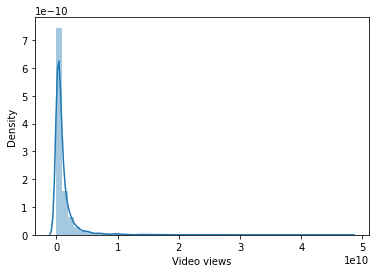

In [10]:
sns.distplot(youtube1['Video views'])

<div class="alert alert-block alert-danger">
Fails normal distribution; Positively skewed. Applying Square Root Transformation.
</div>

#### Transformation: Square Root

In [11]:
youtube1['VideoViewsSQRT'] = np.sqrt(youtube1['Video views'])

/var/folders/p_/8z_nx_rn7hjgm91fg71774ym0000gn/T/ipykernel_12396/1646963793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['VideoViewsSQRT'] = np.sqrt(youtube1['Video views'])


In [12]:
youtube1.head()

,Gr2de,Video views,Gr2deR,VideoViewsSQRT
0,0,20869786591,A++,144463.789896
1,0,47548839843,A++,218056.964674
2,0,9793305082,A++,98961.129147
3,0,22675948293,A++,150585.352186
4,0,26273668433,A++,162091.543373


/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsSQRT', ylabel='Density'>

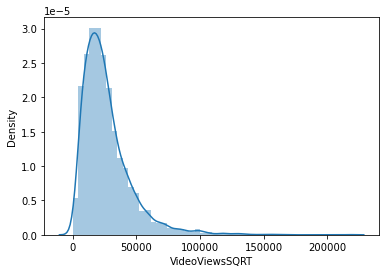

In [13]:
sns.distplot(youtube1['VideoViewsSQRT'])

<div class="alert alert-block alert-warning">
Looks more normal, but will proceed to LOG transformation to be sure. 
</div>

### Transformation: LOG

In [14]:
youtube1['VideoViewsLOG'] = np.log(youtube1['Video views'])

/var/folders/p_/8z_nx_rn7hjgm91fg71774ym0000gn/T/ipykernel_12396/33976722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube1['VideoViewsLOG'] = np.log(youtube1['Video views'])


In [15]:
youtube1.head()

,Gr2de,Video views,Gr2deR,VideoViewsSQRT,VideoViewsLOG
0,0,20869786591,A++,144463.789896,23.761568
1,0,47548839843,A++,218056.964674,24.585023
2,0,9793305082,A++,98961.129147,23.004965
3,0,22675948293,A++,150585.352186,23.844571
4,0,26273668433,A++,162091.543373,23.991833


/Users/heather/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VideoViewsLOG', ylabel='Density'>

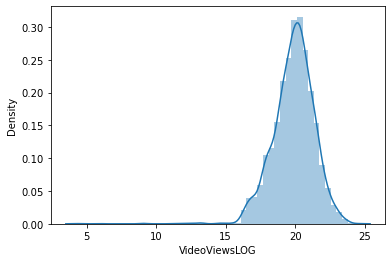

In [16]:
sns.distplot(youtube1['VideoViewsLOG'])

<div class="alert alert-block alert-success">
Seems more normal, with less of a drop off on the left.</div>

### Assumption: Homogeneity of Variance
Using `Bartlett's test` since the data is now transformed close to normal distributed.Homogeneity of Variance is met if `p > .05` - *not significant*.

#### Bartlett's Test
To do Bartlett's test, use the function `scipy.stats.bartlett()`, with the argument of the `y data`, followed by the `x data`.

In [17]:
scipy.stats.bartlett(youtube1['VideoViewsLOG'], youtube1['Gr2de'])

BartlettResult(statistic=4642.606911455061, pvalue=0.0)

<div class="alert alert-block alert-danger">
Fails assumption of Homogeneity of Variance.<br>
<i>p < .05</i>, which means that the data fails the assumption of Homogeneity of Variance.</div>

### Assumption: Sample Size
*An ANOVA requires a sample size of at least 20 per independent variable.*<br>
Number of independent variables: 1<br>Required number of cases: 20

Number of cases: 5000

In [18]:
youtube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gr2de           5000 non-null   int64  
 1   Video views     5000 non-null   int64  
 2   Gr2deR          5000 non-null   object 
 3   VideoViewsSQRT  5000 non-null   float64
 4   VideoViewsLOG   5000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 195.4+ KB


### Assumption: Independence
There is no statistical test for the assumption of independence, so you can proceed!

---
## Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)
In this case, your data did not meet this assumption, but for the purposes of learning, you'll be shown what to do if you had:

In [19]:
stats.f_oneway(youtube1['VideoViewsLOG'][youtube1['Gr2deR']=='A++'],
               youtube1['VideoViewsLOG'][youtube1['Gr2deR']=='A+'],
               youtube1['VideoViewsLOG'][youtube1['Gr2deR']=='A'],
               youtube1['VideoViewsLOG'][youtube1['Gr2deR']=='B+'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

<div class="alert alert-block alert-warning">
<b><i>p < .05</i></b>, which means there is a significant difference in `Video views` between grades `Gr2de`.</div>

___
## Post Hocs
Run post-hocs to figure out what groups significantly differed from each other. In Python, the only automatically coding for post-hocs that is available is the Tukey post hoc.

### Computing Post Hocs with Tukey's

In [20]:
postHoc = MultiComparison(youtube1['VideoViewsLOG'], youtube1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103    0.0 -4.2146 -1.9913   True
     0      3  -4.1291   -0.0 -5.2399 -3.0184   True
     1      2  -1.5797   -0.0  -2.133 -1.0264   True
     1      3  -2.6059   -0.0 -3.1573 -2.0544   True
     2      3  -1.0262   -0.0 -1.1278 -0.9245   True
----------------------------------------------------


This output provides the mean difference in variables, plus the confidence interval (`lower` and `upper` columns), and whether or not you can reject the null hypothesis.

If the value in the `reject` column is `True`, then this means there was a significant difference in the means between those groups.

___
## Determine Means and Draw Conclusions
Examine the means to determine what the difference is between variables.

In [21]:
youtube1.groupby('Gr2deR').mean()

,Gr2de,Video views,VideoViewsSQRT,VideoViewsLOG
Gr2deR,,,,
A,2.0,1.676207e+09,34678.089608,20.475580
A+,1.0,6.053121e+09,70951.341638,22.055279
A++,0.0,2.119909e+10,139631.341341,23.578544
B+,3.0,5.265217e+08,19943.101566,19.449400


<div class="alert alert-block alert-info">
<h1>Conclusion:</h1><br>
The number of views for each `Gr2de` level varies significantly, with higher grades receiving more views and lower grades receiving fewer views.</div>